# 线性回归示例

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
#读取数据源: 面积、房价
filename = 'ex1data2.txt'
content = np.loadtxt(filename, delimiter=',', usecols=(0, 2))

In [6]:
#数据归一化
def nomalization(arr):
    range = np.max(arr) - np.min(arr)
    return (arr - np.min(arr)) / range

In [7]:
#选择第一列数据作为x轴
x = content[:, :1]
#选择第二列数据作为y轴
y = content[:, 1:]

In [8]:
x = nomalization(x)
y = nomalization(y)

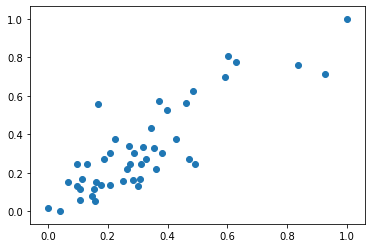

In [9]:
plt.scatter(x, y)

In [10]:
#线性函数公式
def formula(a, b, x):
    return a*x + b

In [11]:
#优化函数
def optimifunc(a, b, x, y, times):
    rate = 0.01
    n = x.size
    yhat = y
    for i in range(times):
        yhat = formula(a, b, x)
        da = np.sum((yhat - y) * x) / n
        db = np.sum(yhat - y) /n
        a = a - rate * da
        b = b - rate * db
    plt.scatter(x,y)
    plt.plot(x, yhat)
    return a, b

In [12]:
#初始化参数
a, b = 0, 0

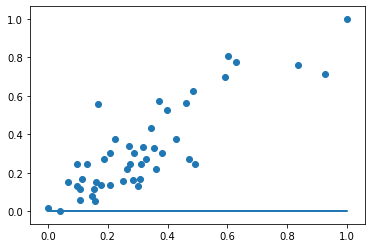

In [13]:
#学习、训练参数
a, b = optimifunc(a, b, x, y, 1)

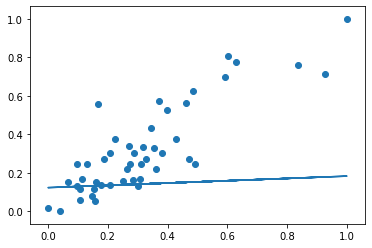

In [14]:
a, b = optimifunc(a, b, x, y, 50)

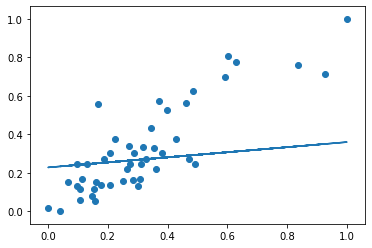

In [15]:
a, b = optimifunc(a, b, x, y, 100)

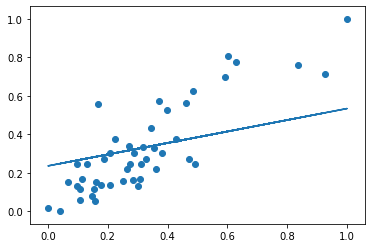

In [16]:
a, b = optimifunc(a, b, x, y, 500)

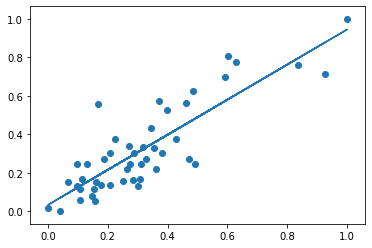

In [17]:
a, b = optimifunc(a, b, x, y, 10000)

# 理论知识

先看下房子面积与价格的趋势图：

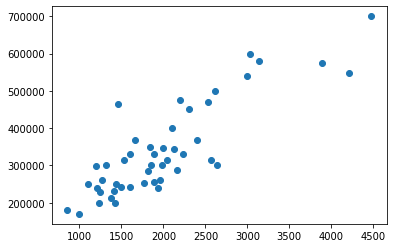

In [20]:
plt.scatter(content[:, :1], content[:, 1:])

根据上图可以看出，房子的面积与房价之间的关系是线性的，也就是房子面积越大价格越高。现在要根据已有数据，根据新给的房子面积，预测出最合理的价格。

### 数据模型

线性关系，可以用线性函数来表示：y = ax + b

现在x（房子的面积）和y（房子的价格）已经有了，因此，主要是根据历史数据得出a、b的解。例如`2014 * a + b = 399900`，可以看到因为有两个参数，所以无法直接得出a和b的解。

这就是机器学习的特殊的地方，一个是历史数据多，而且数据不太规则；另一个就是无法直接套用公式得出解。那怎么办呢？采用逼近法。就是先假设a和b的值，然后套用公式得出y的值和历史的y值进行比较，
根据y值的接近程度来调整a和b，直到a、b带入到整个历史数据中得出y的值和历史的y值最接近，就称为公式的最优解。

假设a、b的初始值为0，带入公式：`2014 * 0 + 0 = 0`，结果为0（我们将计算出来的y值称为yhat，用于真实的y值做区分），而真实y的值为`399900`，因此0不是a、b的最优解。如何评判是不是最优解呢？
一般通过yhat与y值进行比较。yhat与y进行比较的函数我们叫做损失函数（Loss Function）或代价函数（Cast Function）。

### 代价函数

损失函数是单个样本上的误差，如上例中的yhat计算结果为0，而实际y值为399900，两者的误差为y-yhat=399900。y-yhat就是损失函数。而代价函数指的是整个训练集上所有样本的误差。

代价函数的作用就是来评价参数a、b与预期结果的拟合程度。

上面的示例中，我们采用的代价函数是$$\frac{1}{2m}\sum_{i=1}^{m}(h(x^i)-y^i)^2$$

yhat-y就是误差值，通过这个意义就可以看出代价函数是用来计算误差的，误差越小说明越接近目标。对误差值平方再求和，一看就知道是方差公式（方差定义参见另一篇文章）。也就是说这里用方差作为代价函数。

只要我们不停变换参数a、b的值带入训练集，然后通过代价函数来评判哪个更优，将a、b所有的可能性遍历完后，就可以得出最优a和b。

### 梯度下降

通过代价函数可以计算出来不同的参数的优劣，然而我们不可能真的将所有a、b遍历计算。因此需要找一种好的方法，用最快的速度找出a和b，也就是最短路径。

梯度下降就是找出最短路径的一种方法。其原理类似你站在一个山坡上，360度观察四周，朝哪个方向走可以快速下山。转换成数学方式，就是求导。

因为我们的代价函数是二阶函数，二阶导数的意义是凹凸性，通过凹凸性来判断是上坡还是下坡，让我们朝坡下快速行进。需要注意的是，因为函数可能存在多个凹点，因此最终得出的a、b只是局部最优解，而不是全局最优解。

最后一点是rate，就是下山的方向每次迈出的步子有多大，不能太大也不能太小。对代价函数求导后的函数，我们一般称之为优化函数。

对a求导：$$\frac{\partial J}{\partial a}= \frac{1}{m}\sum_{i=1}^{m}x(h(x^i)-y^i)$$

对b求导：$$\frac{\partial J}{\partial b}= \frac{1}{m}\sum_{i=1}^{m}(h(x^i)-y^i)$$

更新a:       $a = a - \alpha \frac{\partial J}{\partial a}$

更新b:       $b = b - \alpha \frac{\partial J}{\partial b}$

其中$\alpha$就是rate。

### 欠拟合、过拟合

首先确定一点：过拟合和欠拟合都是不好的，预测的准确度低。

在做机器学习时，会将历史数据分为两部分：一部分是训练集，另一部分是测试集。用训练集得出最优函数，再用测试集去验证这个函数是否符合实际需求。

欠拟合就是训练集上表现差，测试集上预测准确度低。过拟合是在训练集上表现过于良好，但在测试集上表现差。

### 总结

机器学习涉及到很多方面的知识，跟以往我们解决问题的方式有很大区别，因此要先从思维上做些转换，再根据自身的目的，对涉及面做些取舍，毕竟我们是为了解决问题，而不是要成为这方面的专家。